In [1]:
import bambi as bmb
import arviz as az
import pandas as pd

In [2]:
file = 'https://gist.githubusercontent.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb/raw/bf95a2e30fceb9f2ae990eac8379fc7d844a0196/weight-height.csv'

data = pd.read_csv(file).sample(frac=.05, random_state=1234)

data.columns = data.columns.str.lower()

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 2374 to 7040
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  500 non-null    object 
 1   height  500 non-null    float64
 2   weight  500 non-null    float64
dtypes: float64(2), object(1)
memory usage: 15.6+ KB


,gender,height,weight
2374,Male,70.752012,197.838902
1784,Male,71.243112,192.017261
6301,Female,60.673431,112.715433
1600,Male,66.968936,169.392797
7920,Female,61.981210,118.821493


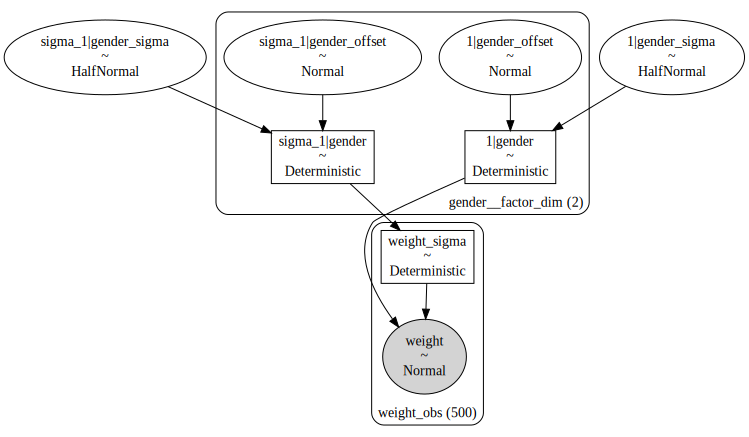

In [3]:
formula = bmb.Formula("weight ~ -1 + (1|gender)", "sigma ~ -1 + (1|gender)")

model = bmb.Model(formula, data)

model.build()

model.graph()

In [4]:
idata = model.fit(inference_method='nuts_numpyro', draws=4_000, tune=3_000, target_accept=.99)

/opt/homebrew/Caskroom/miniforge/base/envs/bambi_dev/lib/python3.10/site-packages/pymc/sampling/jax.py:37: UserWarning: This module is experimental.
  warnings.warn("This module is experimental.")


Compiling...
Compilation time =  0:00:00.818188
Sampling...


  0%|          | 0/7000 [00:00<?, ?it/s]

  0%|          | 0/7000 [00:00<?, ?it/s]

  0%|          | 0/7000 [00:00<?, ?it/s]

  0%|          | 0/7000 [00:00<?, ?it/s]

Sampling time =  0:00:18.992231
Transforming variables...
Transformation time =  0:00:00.076013
Computing Log Likelihood...
Log Likelihood time =  0:00:00.217562


In [5]:
df_summary = az.summary(idata)

df_summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|gender_sigma,131.676,36.720,67.061,197.220,0.670,0.474,2742.0,2710.0,1.0
sigma_1|gender_sigma,1.973,0.464,1.143,2.811,0.008,0.006,2836.0,2906.0,1.0
1|gender[Female],137.635,1.143,135.552,139.866,0.009,0.006,17133.0,11822.0,1.0
1|gender[Male],188.826,1.214,186.587,191.144,0.009,0.006,17495.0,12873.0,1.0
sigma_1|gender[Female],2.836,0.047,2.752,2.927,0.000,0.000,12802.0,10111.0,1.0
...,...,...,...,...,...,...,...,...,...
weight_sigma[495],17.070,0.804,15.609,18.613,0.007,0.005,12802.0,10111.0,1.0
weight_sigma[496],17.070,0.804,15.609,18.613,0.007,0.005,12802.0,10111.0,1.0
weight_sigma[497],17.070,0.804,15.609,18.613,0.007,0.005,12802.0,10111.0,1.0
weight_sigma[498],20.218,0.872,18.602,21.874,0.008,0.005,13171.0,10329.0,1.0


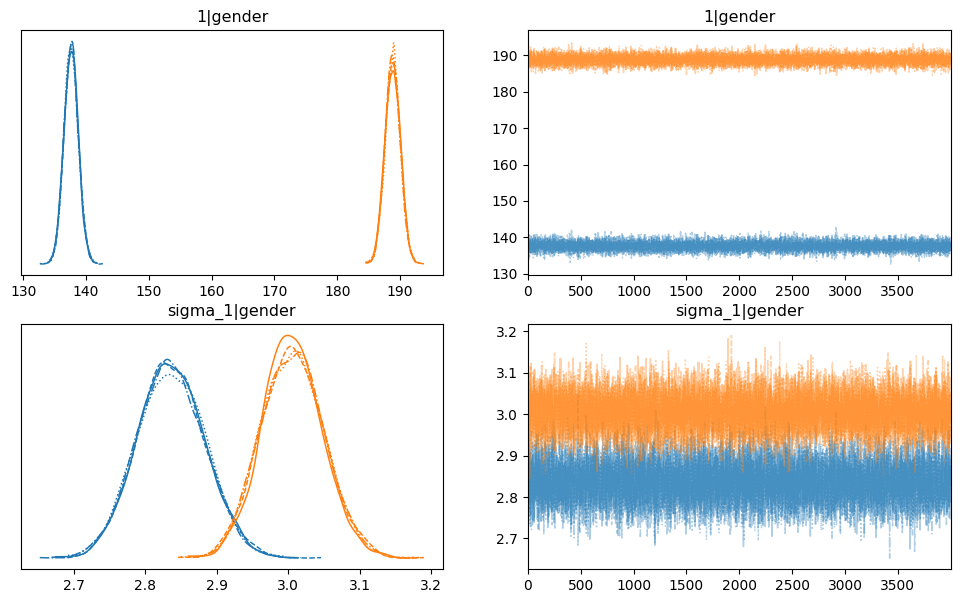

In [6]:
az.plot_trace(idata, var_names=['1|gender', 'sigma_1|gender'], compact=True, figsize=(12,7));